In [1]:
clear all
imatlab_export_fig('print-svg')  % Static svg figures.
cd matlab
pwd
format compact

ans =
    '/Users/eechris/code/src/github.com/cpjobling/eg-247-textbook/dt_systems/4/matlab'


In [2]:
Nz = [1 1 0];

In [3]:
Dz = [1 -0.5 0.125];

In [4]:
[r,p,k] = residue(Nz,Dz)

r =
   0.7500 - 0.5000i
   0.7500 + 0.5000i


p =
   0.2500 + 0.2500i
   0.2500 - 0.2500i


k =
     1


In [5]:
Hz = tf(Nz,Dz,1)
hn = impulse(Hz, 15);


Hz =


        z^2 + z


  -------------------


  z^2 - 0.5 z + 0.125


Sample time: 1 seconds


Discrete-time transfer function.



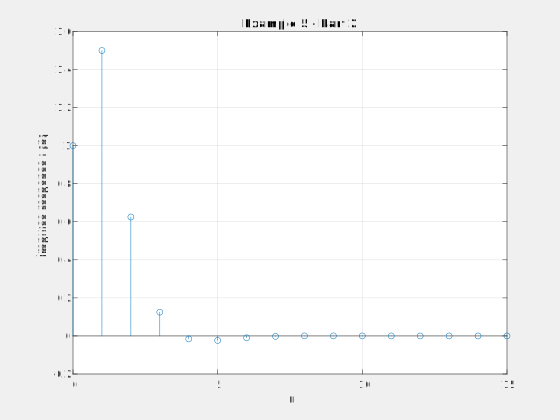

In [6]:
stem([0:15], hn)
grid
title('Example 5 - Part 2')
xlabel('n')
ylabel('Impulse response h[n]')

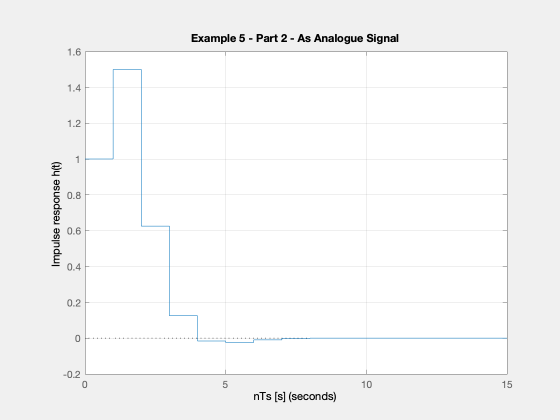

In [7]:
impulse(Hz,15)
grid
title('Example 5 - Part 2 - As Analogue Signal')
xlabel('nTs [s]')
ylabel('Impulse response h(t)')

In [8]:
open dtm_ex1_3

In [9]:
Ts = 1;
z = tf('z', Ts);

In [10]:
Hz = (z^2 + z)/(z^2 - 0.5 * z + 0.125)


Hz =


        z^2 + z


  -------------------


  z^2 - 0.5 z + 0.125


Sample time: 1 seconds


Discrete-time transfer function.



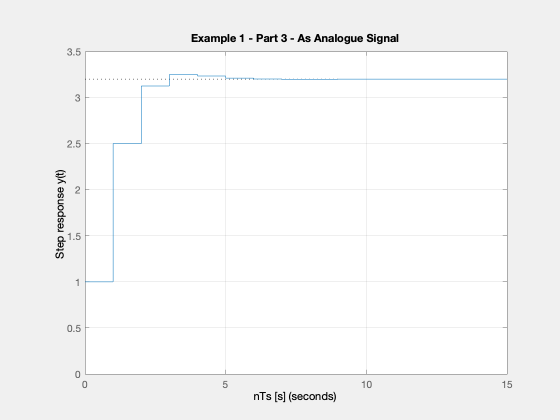

In [11]:
step(Hz)
grid
title('Example 1 - Part 3 - As Analogue Signal')
xlabel('nTs [s]')
ylabel('Step response y(t)')
axis([0,15,0,3.5])

In [12]:
dtm

In [13]:
help c2d

 C2D  Converts continuous-time dynamic system to discrete time.
 
    SYSD = C2D(SYSC,TS,METHOD) computes a discrete-time model SYSD with
    sample time TS that approximates the continuous-time model SYSC.
    The string METHOD selects the discretization method among the following:
       'zoh'           Zero-order hold on the inputs
       'foh'           Linear interpolation of inputs
       'impulse'       Impulse-invariant discretization
       'tustin'        Bilinear (Tustin) approximation.
       'matched'       Matched pole-zero method (for SISO systems only).
       'least-squares' Least-squares minimization of the error between
                       frequency responses of the continuous and discrete
                       systems (for SISO systems only).
       'damped'        Damped Tustin approximation based on TRBDF2 formula
                       (sparse models only).
    The default is 'zoh' when METHOD is omitted. The sample time TS should
    be specified in the time

In [14]:
doc c2d

In [15]:
wc = 2*pi*20e3

wc =
   1.2566e+05


In [16]:
Hs = tf(wc^2,[1 wc*sqrt(2), wc^2])


Hs =


           1.579e10


  ---------------------------


  s^2 + 1.777e05 s + 1.579e10


Continuous-time transfer function.



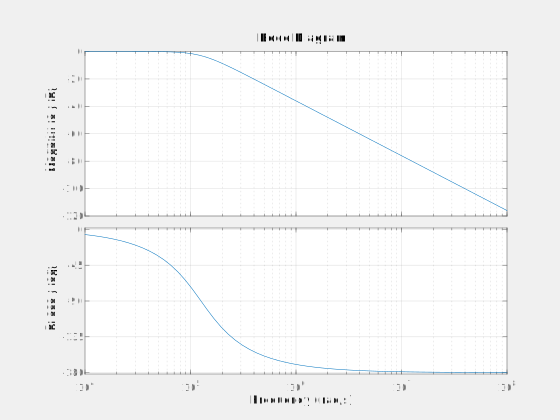

In [17]:
bode(Hs,{1e4,1e8})
grid

In [18]:
ws = 2* 12.6e6

ws =
    25200000


In [19]:
fs = ws/(2*pi)

fs =
   4.0107e+06


In [20]:
Ts = 1/fs

Ts =
   2.4933e-07


In [21]:
Hz = c2d(Hs, Ts)


Hz =


  0.0004836 z + 0.0004765


  -----------------------


  z^2 - 1.956 z + 0.9567


Sample time: 2.4933e-07 seconds


Discrete-time transfer function.



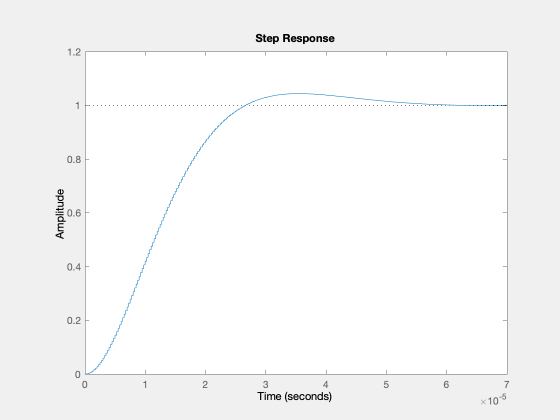

In [22]:
step(Hz)

In [23]:
open digifilter